In [5]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [157]:
df_samp = pd.read_csv('data/look_right/1448735789.csv')

In [158]:
def subtract_from_prev_val(df, col, step=1):
    return (df[col] - df.shift(periods=step)[col])

def make_delta_features(df, step=1, ignore_columns=[]):
    cols = df.columns.values.tolist()
    for c in ignore_columns:
        cols.remove(c)
    deltas = {}
    for c in cols:
        deltas[c] = subtract_from_prev_val(df, c, step=step)
    df_new = pd.DataFrame(deltas)
    for c in ignore_columns:
        df_new[c] = df[c]
    return df_new
df_deltas = make_delta_features(df_samp, ignore_columns=['time'], step=2).fillna(0)


In [159]:
# Generate window at each point
def generate_windows(df, window=10, relative_columns = None):
    points = []
    cols = relative_columns
    if relative_columns == None:
        cols = df.columns.values
    for i, r in df.iterrows():
        w_start = i
        w_end   = min(i + 100, len(df)-1)
        row = r.to_dict()
        df_w = df.loc[w_start:w_end].reset_index(drop=True)
        for j in xrange(0,window):
            if j < len(df_w):
                window_row = df_w.loc[j].to_dict()
            else:
                window_row = None
            for c in cols:
                name = '%s_%s' % (c, j)
                row[name] = window_row[c] if window_row != None else None
        points.append(row)
        

    return pd.DataFrame(points)

def run_and_plot_kmeans(df, k):
    pca = PCA(n_components =2)
    kmean = KMeans(n_clusters=k)

    X = pca.fit_transform(df)
    Y = kmean.fit_predict(X)
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.title('PCA with Windowed Data and Kmeans (K = %s)'% k )
    return Y
df_w = generate_windows(df_deltas.drop(['time'],axis=1), window=5)

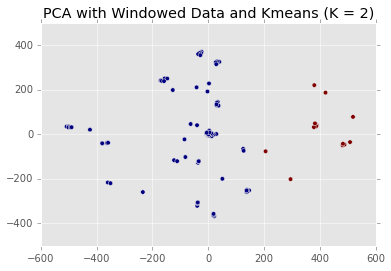

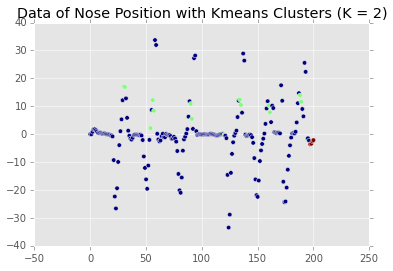

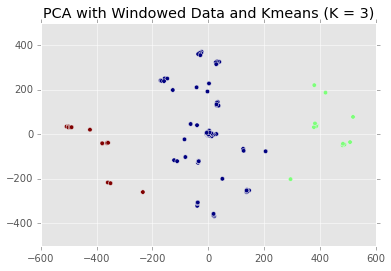

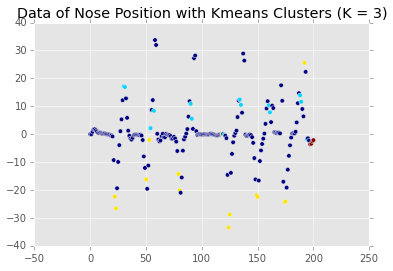

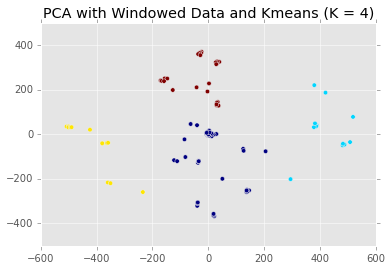

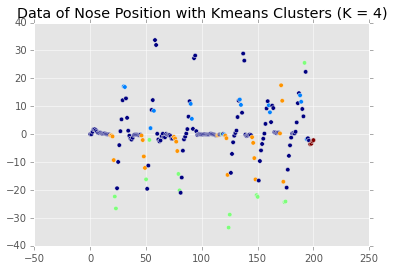

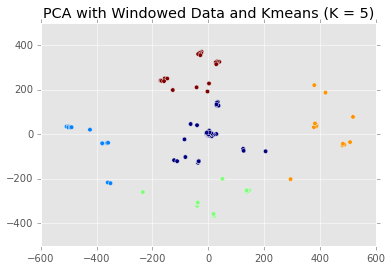

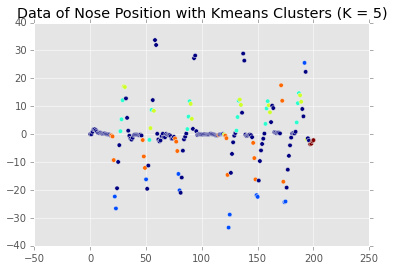

In [160]:

ks = [2,3,4,5,]
for k in ks:
    df_s = df_deltas.copy()
    Y = run_and_plot_kmeans(df_w[~df_w['noseX_4'].isnull()],k)
    null_case = [k]*(len(df_w) - len(Y))
    Y = np.hstack([Y, null_case])
    df_s['class'] = Y
    plt.figure()
    plt.scatter(df_s.index, df_s['noseX'], c=df_s['class'])
    plt.title('Data of Nose Position with Kmeans Clusters (K = %s)'% k)

# Testing the Algorithm on Multiple Turns

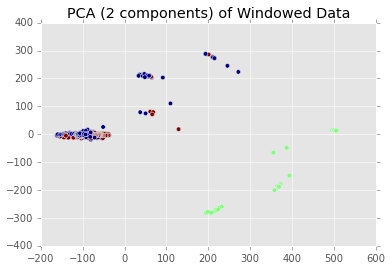

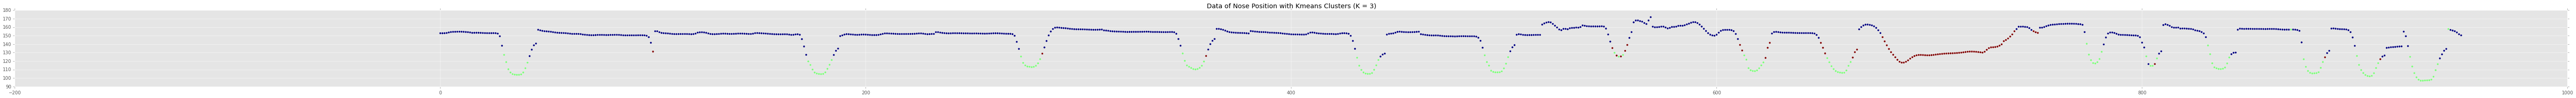

In [161]:

df_dump = pd.read_csv('data/merged/look_right.csv')

pca = PCA(n_components=2)
cols = df_dump.columns.values.tolist()
cols.remove('time')
X = pca.fit_transform(df_dump[cols].fillna(0))
plt.scatter(X[:,0], X[:,1],c=df_dump['class'])
plt.title('PCA (2 components) of Windowed Data')
plt.figure()
plt.figure(figsize =(100,3))
plt.scatter(df_dump.index, df_dump['noseX_raw'], c=df_dump['class'])
plt.title('Data of Nose Position with Kmeans Clusters (K = 3)')

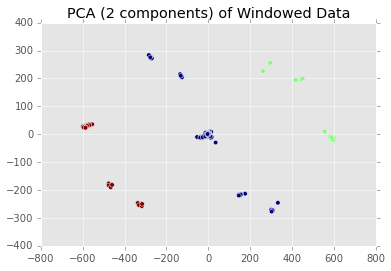

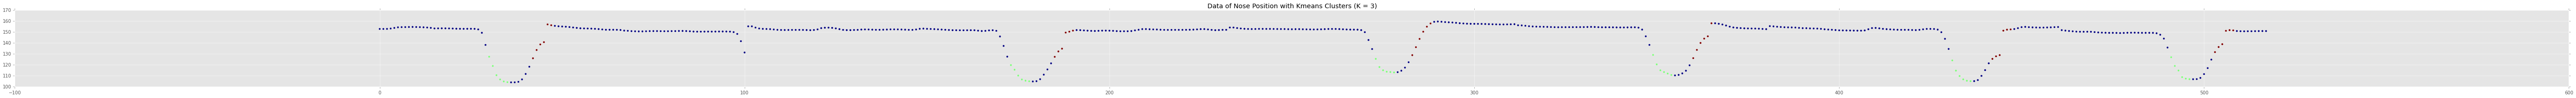

In [152]:

df_dump = pd.read_csv('data/merged/look_right.csv')

pca = PCA(n_components=2)
cols = df_dump.columns.values.tolist()
cols.remove('time')
X = pca.fit_transform(df_dump[cols].fillna(0))
plt.scatter(X[:,0], X[:,1],c=df_dump['class'])
plt.title('PCA (2 components) of Windowed Data')
plt.figure()
plt.figure(figsize =(100,3))
plt.scatter(df_dump.index, df_dump['noseX_raw'], c=df_dump['class'])
plt.title('Data of Nose Position with Kmeans Clusters (K = 3)')

In [71]:
df_dump.columns.values

array(['faceBottom', 'faceBottom_0', 'faceBottom_1', 'faceBottom_2',
       'faceBottom_3', 'faceBottom_4', 'faceLeft', 'faceLeft_0',
       'faceLeft_1', 'faceLeft_2', 'faceLeft_3', 'faceLeft_4', 'faceRight',
       'faceRight_0', 'faceRight_1', 'faceRight_2', 'faceRight_3',
       'faceRight_4', 'faceTop', 'faceTop_0', 'faceTop_1', 'faceTop_2',
       'faceTop_3', 'faceTop_4', 'isFrontFace', 'isFrontFace_0',
       'isFrontFace_1', 'isFrontFace_2', 'isFrontFace_3', 'isFrontFace_4',
       'noseX', 'noseX_0', 'noseX_1', 'noseX_2', 'noseX_3', 'noseX_4',
       'noseY', 'noseY_0', 'noseY_1', 'noseY_2', 'noseY_3', 'noseY_4',
       'time', 'class'], dtype=object)